In [1]:
import importlib
import data_generation
import feature_distribution
import matplotlib.pyplot as plt

In [2]:
importlib.reload(data_generation)

dataset = data_generation.generate_dataset(10000)

In [10]:
len(dataset[1])

10000

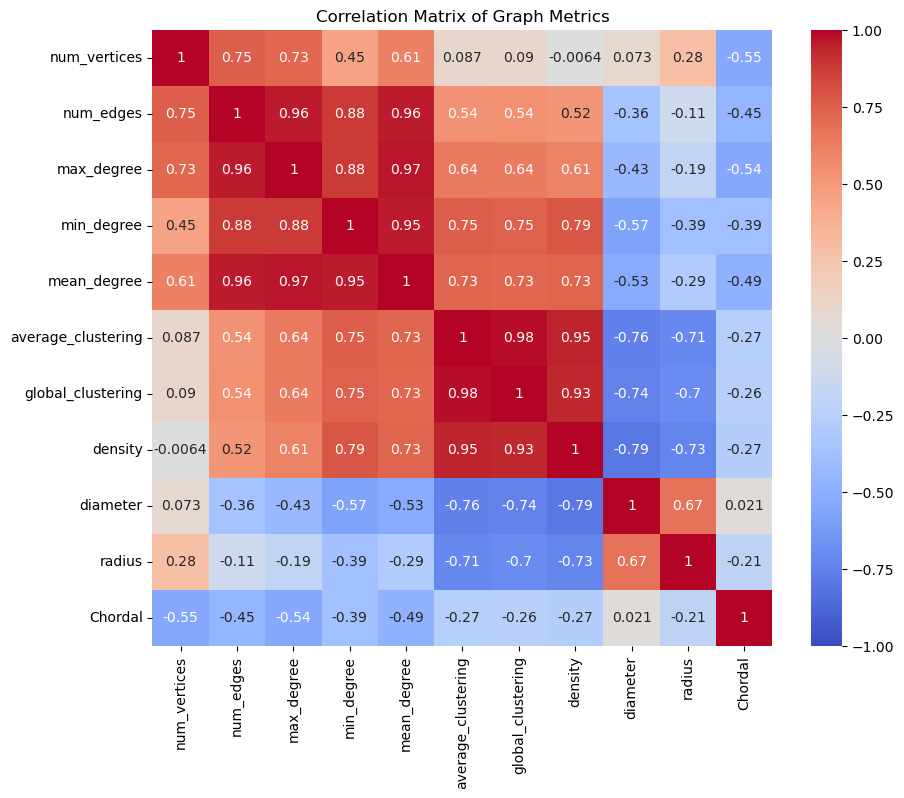

In [18]:
importlib.reload(feature_distribution)
corr = feature_distribution.correlation(dataset)
plt.show()

In [17]:
df.head()

,num_vertices,num_edges,max_degree,min_degree,mean_degree,average_clustering,global_clustering,density,diameter,radius,Chordal
0,18,125,16,11,13.888889,0.817878,0.271779,0.816993,2.0,2.0,False
1,7,13,5,3,3.714286,0.595238,0.184211,0.619048,2.0,2.0,False
2,13,13,4,0,2.000000,0.166667,0.043478,0.166667,inf,inf,False
3,19,142,18,13,14.947368,0.826620,0.275275,0.830409,2.0,1.0,False
4,8,5,2,0,1.250000,0.000000,0.000000,0.178571,inf,inf,True


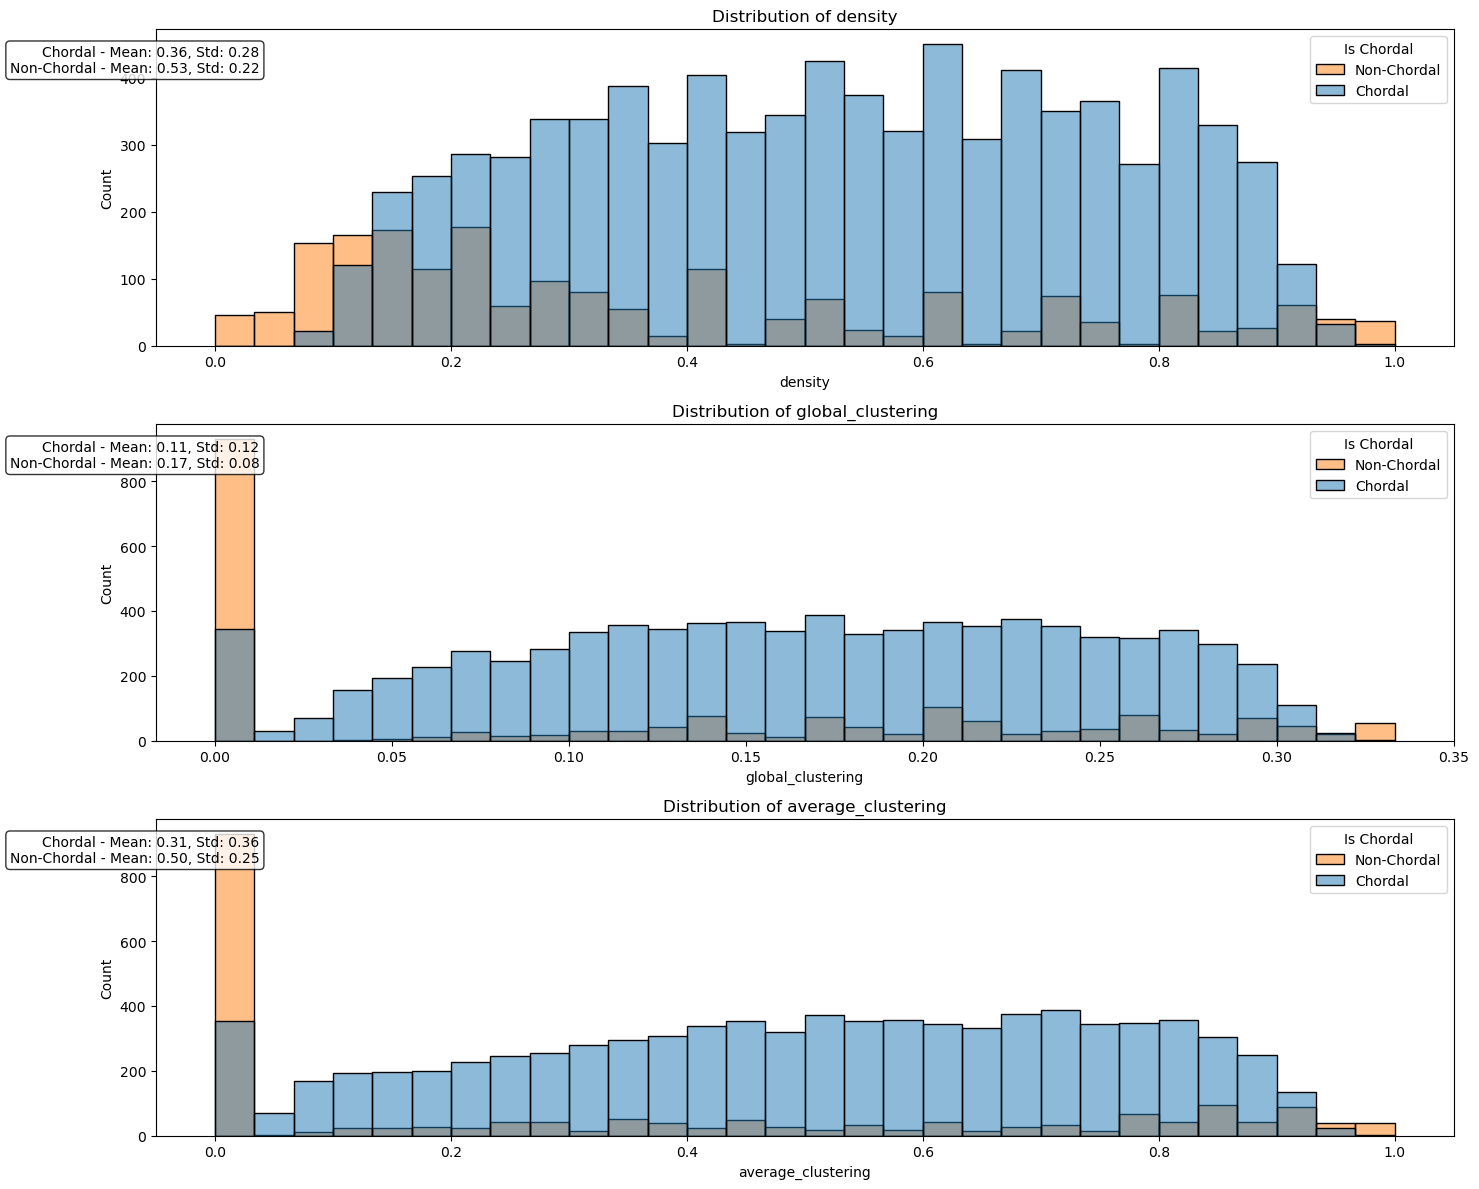

In [3]:
importlib.reload(feature_distribution)
# Select features to visualize
selected_features = ['density', 'global_clustering', 'average_clustering']
    
# Create and show the plots
fig = feature_distribution.visualise(dataset, selected_features)
plt.show()